<a href="https://colab.research.google.com/github/imrealhelper/Linear-Algebra/blob/main/soft_ware_labs/Ex_Categorizing_FIFA19_soccer_players.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Categorizing FIFA'19 soccer players

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\Z}{\mathbf{Z}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
\newcommand{\loss}{\ell}
\newcommand{\eloss}{\mc{L}}
\newcommand{\abs}[1]{| #1 |}
\newcommand{\norm}[1]{\| #1 \|}
\newcommand{\tp}{T}
$$

__<div style="text-align: right"> EE370: Software lab, Kyung Hee University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@khu.ac.kr) </div>_

The following loads the analysis records containing detailed attributes of 13,000 soccer players.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('http://jonghank.github.io/ee370/files/fifa19data.csv')
df = df[:13000]

For example the first five players:

In [2]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


The columns from 'Crossing', 'Finishing', 'HeadingAccuracy' all the way up to 'GKPositioning' and GKReflexes' contain a variety of rating scores on 34 skill sets for each player.

We'd like to cluster the 13,000 players into 6 groups, purely based on those ratings the 34 skill sets.

**(Problem 1)** Crop the 34 columns from 'Crossing' to 'GKReflexes' out to build a feature matrix. Save it in a numpy array.

In [14]:
df.loc[:, 'Crossing':'GKReflexes']

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,41.0,37.0,55.0,65.0,27.0,57.0,37.0,43.0,62.0,61.0,...,49.0,44.0,62.0,64.0,62.0,15.0,10.0,7.0,12.0,10.0
12996,56.0,60.0,38.0,70.0,39.0,63.0,55.0,44.0,66.0,63.0,...,60.0,55.0,55.0,36.0,49.0,14.0,11.0,14.0,15.0,14.0
12997,51.0,61.0,59.0,74.0,44.0,58.0,43.0,48.0,72.0,56.0,...,52.0,57.0,58.0,56.0,64.0,7.0,12.0,11.0,7.0,13.0
12998,38.0,66.0,57.0,58.0,63.0,64.0,51.0,32.0,42.0,61.0,...,68.0,52.0,20.0,18.0,17.0,10.0,14.0,11.0,12.0,11.0


In [27]:
# your code here
X= df.loc[:, 'Crossing':'GKReflexes'].values

In [33]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

**(Problem 2)** Fit a $k$-means model to cluster the players into 6 categories. You may use the `Kmeans` module from the `scikit-learn` package (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

In [28]:
# your code here
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=0, n_init="auto").fit(X)

In [55]:
L = kmeans.cluster_centers_
results = []
for l in L:
  a = sorted(l,reverse=True)
  result = []
  for i in a[:5]:
    num = int(np.where(l==i)[0])
    result.append(df.loc[:, 'Crossing':'GKReflexes'].columns[num])
  results.append(result)





<ipython-input-55-6d6a6e0a72f9>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  num = int(np.where(l==i)[0])


In [57]:
for i in range(len(results)):
  print(f"Best skills for category {i}: {results[i]}")

Best skills for category 0: ['Strength', 'Jumping', 'Aggression', 'StandingTackle', 'HeadingAccuracy']
Best skills for category 1: ['Strength', 'SprintSpeed', 'Jumping', 'ShotPower', 'Acceleration']
Best skills for category 2: ['GKReflexes', 'GKDiving', 'GKPositioning', 'GKHandling', 'GKKicking']
Best skills for category 3: ['Stamina', 'Jumping', 'SprintSpeed', 'Acceleration', 'Strength']
Best skills for category 4: ['Agility', 'Acceleration', 'SprintSpeed', 'Balance', 'Dribbling']
Best skills for category 5: ['Stamina', 'ShortPassing', 'BallControl', 'ShotPower', 'Agility']


Best skills for category 0: ['GKReflexes' 'GKDiving' 'GKPositioning' 'GKHandling' 'GKKicking']
Best skills for category 1: ['Agility' 'Acceleration' 'SprintSpeed' 'Balance' 'Dribbling']
Best skills for category 2: ['Stamina' 'Jumping' 'SprintSpeed' 'Acceleration' 'Strength']
Best skills for category 3: ['Strength' 'Jumping' 'Aggression' 'StandingTackle' 'HeadingAccuracy']
Best skills for category 4: ['Strength' 'SprintSpeed' 'Jumping' 'ShotPower' 'Acceleration']
Best skills for category 5: ['Stamina' 'ShortPassing' 'BallControl' 'ShotPower' 'Agility']


The column 'Position' from the original dataframe contains the most preferred positions for each player. For abbreviations, refer to http://logfact.com/football-soccer-field-player-positions-abbreviations/. For example, the whole records of 13,000 players are consisted of the following positions.



In [63]:
import plotly.express as px
# 예시 데이터프레임
fig = px.pie(df, names='Position', title='Whole records of 13,000 players',
             color_discrete_sequence=px.colors.sequential.Plasma)

fig.show()

**(Problem 4)** For each group, show the members' positions in a pie chart. You may find `df['a'].value_counts()` which counts the number of different items on the column `a`, or `df['a'].value_counts().plot(kind='pie')` which plots the pie chart, helpful.

In [66]:
df["category"] = kmeans.predict(X)
result_df = []
for i in range(6):
  result_df.append(df[df['category'] == i])


In [69]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 서브플롯 만들기 (3x2 배열로 총 6개의 서브플롯)
fig = make_subplots(rows=3, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}],
                                           [{'type':'domain'}, {'type':'domain'}],
                                           [{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=[f"Category {i}" for i in range(6)])  # 제너레이터를 리스트로 변경

# 각 카테고리에 대해 반복하며 서브플롯에 파이 차트를 추가
for i in range(6):
    # 해당 카테고리의 데이터프레임 필터링
    df_category = df[df['category'] == i]

    # Plotly Express를 이용해 파이 차트 생성
    pie_chart = px.pie(df_category, names='Position', title=f'Category {i}',
                       color_discrete_sequence=px.colors.sequential.Plasma)

    # 파이 차트를 서브플롯에 추가
    fig.add_trace(go.Pie(labels=df_category['Position'].value_counts().index,
                         values=df_category['Position'].value_counts().values,
                         showlegend=False),  # 범례 표시 여부
                  row=(i//2)+1, col=(i%2)+1)

# 전체 레이아웃 크기와 스타일 조정
fig.update_layout(
    title_text="Pie Charts by Category",
    title_font_size=24,  # 제목 크기 조정
    height=900,  # 전체 그림의 높이 조정
    width=900,   # 전체 그림의 너비 조정
    font=dict(size=18)  # 서브플롯 제목과 레이블의 폰트 크기 조정
)

# 차트 표시
fig.show()

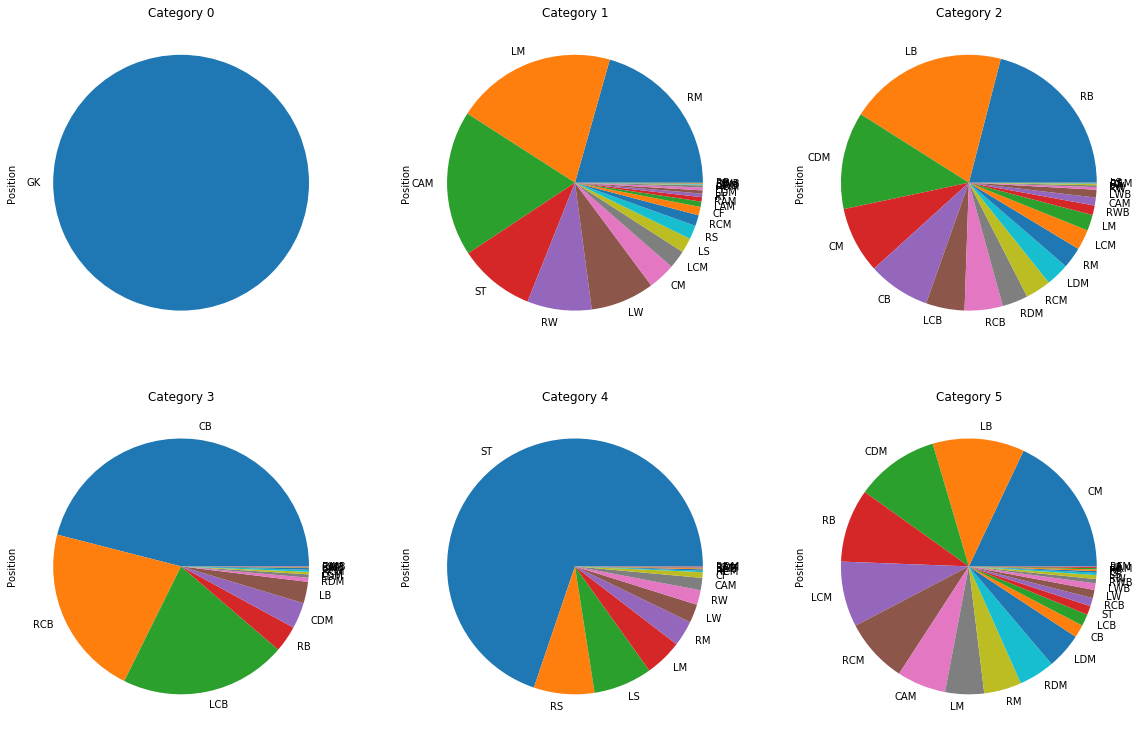

In [ ]:
for i in range()